In [26]:
#linear regression is a supervised regression model, but logistic regression is a supervised classification model
#predicting the value of a certain image - classifying it based on training data

import torch
#The torchvision package consists of popular datasets, model architectures, and common image transformations 
#for computer vision.
import torchvision
#import the MNIST dataset, which has all of the images - very popular, like the iris dataset
from torchvision.datasets import MNIST
import numpy
import torchvision.transforms as transforms
import numpy as np

from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [27]:
#training set and testing set
dataset = MNIST(root="data/", train=True, transform = transforms.ToTensor())
test_dataset = MNIST(root="data/", train=False, transform = transforms.ToTensor())

In [28]:
print(dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [29]:
#validation set
perms = (np.random.permutation(len(dataset)))
san_per = 0.2
indices = int(len(dataset)*san_per)
print(indices)
train_indices = perms[indices:]
val_indices = perms[:indices]

12000


In [30]:
#training dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, 100, sampler=train_sampler)

In [31]:
#validation dataloader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, 100, sampler=val_sampler)

In [32]:
#model

#the forward function just computes the outputs based on the inputs, or xb in this case
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        #the reason for these inputs and outputs are because we want to flatten out the image, and then also 
        #the outputs are for the probabilites of the item being from 0 - 9
        self.linear = nn.Linear(28*28, 10)
        
    def forward(self,xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
        

In [33]:
model = MnistModel()

#does softmax on its own, so the items can be changed to probabilities
loss_fn = F.cross_entropy


In [57]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)


In [78]:
def loss_on_batch(loss_fn, model, xb, yb, opt):
    outputs = model(xb)
    loss = loss_fn(outputs, yb)
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    
    

In [79]:
#model training
def train(epochs, loss_fn, model,train_dl, lr):
    opt = torch.optim.SGD(model.parameters(), lr)
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss_on_batch(loss_fn, model, xb, yb, opt)

In [77]:
train(5, F.cross_entropy, model, train_dl, 0.001)

tensor(316.1358, grad_fn=<NllLossBackward>)
tensor(297.1218, grad_fn=<NllLossBackward>)
tensor(920.8032, grad_fn=<NllLossBackward>)
tensor(403.9447, grad_fn=<NllLossBackward>)
tensor(1578.3365, grad_fn=<NllLossBackward>)
tensor(1220.6776, grad_fn=<NllLossBackward>)
tensor(1005.7071, grad_fn=<NllLossBackward>)
tensor(1047.8760, grad_fn=<NllLossBackward>)
tensor(974.2778, grad_fn=<NllLossBackward>)
tensor(862.3890, grad_fn=<NllLossBackward>)
tensor(348.2113, grad_fn=<NllLossBackward>)
tensor(1107.5323, grad_fn=<NllLossBackward>)
tensor(669.7095, grad_fn=<NllLossBackward>)
tensor(543.7458, grad_fn=<NllLossBackward>)
tensor(395.9707, grad_fn=<NllLossBackward>)
tensor(1141.8395, grad_fn=<NllLossBackward>)
tensor(415.4671, grad_fn=<NllLossBackward>)
tensor(1335.4392, grad_fn=<NllLossBackward>)
tensor(801.6161, grad_fn=<NllLossBackward>)
tensor(672.2096, grad_fn=<NllLossBackward>)
tensor(1029.6514, grad_fn=<NllLossBackward>)
tensor(554.2061, grad_fn=<NllLossBackward>)
tensor(1191.9537, grad_f

tensor(628.6835, grad_fn=<NllLossBackward>)
tensor(884.0008, grad_fn=<NllLossBackward>)
tensor(451.8073, grad_fn=<NllLossBackward>)
tensor(438.2386, grad_fn=<NllLossBackward>)
tensor(1597.9113, grad_fn=<NllLossBackward>)
tensor(556.8330, grad_fn=<NllLossBackward>)
tensor(1388.0264, grad_fn=<NllLossBackward>)
tensor(224.5210, grad_fn=<NllLossBackward>)
tensor(1904.5347, grad_fn=<NllLossBackward>)
tensor(1191.2404, grad_fn=<NllLossBackward>)
tensor(778.5739, grad_fn=<NllLossBackward>)
tensor(963.2880, grad_fn=<NllLossBackward>)
tensor(1338.4320, grad_fn=<NllLossBackward>)
tensor(299.4458, grad_fn=<NllLossBackward>)
tensor(431.3681, grad_fn=<NllLossBackward>)
tensor(2109.3130, grad_fn=<NllLossBackward>)
tensor(1856.2772, grad_fn=<NllLossBackward>)
tensor(1069.3743, grad_fn=<NllLossBackward>)
tensor(2597.9583, grad_fn=<NllLossBackward>)
tensor(799.9080, grad_fn=<NllLossBackward>)
tensor(957.4311, grad_fn=<NllLossBackward>)
tensor(1065.3839, grad_fn=<NllLossBackward>)
tensor(529.0158, grad_

tensor(675.2929, grad_fn=<NllLossBackward>)
tensor(1761.5995, grad_fn=<NllLossBackward>)
tensor(922.0275, grad_fn=<NllLossBackward>)
tensor(921.6763, grad_fn=<NllLossBackward>)
tensor(651.3025, grad_fn=<NllLossBackward>)
tensor(440.5874, grad_fn=<NllLossBackward>)
tensor(1638.0721, grad_fn=<NllLossBackward>)
tensor(1078.1709, grad_fn=<NllLossBackward>)
tensor(423.8944, grad_fn=<NllLossBackward>)
tensor(1403.1592, grad_fn=<NllLossBackward>)
tensor(1315.0344, grad_fn=<NllLossBackward>)
tensor(889.4217, grad_fn=<NllLossBackward>)
tensor(843.9722, grad_fn=<NllLossBackward>)
tensor(871.8363, grad_fn=<NllLossBackward>)
tensor(238.7760, grad_fn=<NllLossBackward>)
tensor(366.4345, grad_fn=<NllLossBackward>)
tensor(380.5706, grad_fn=<NllLossBackward>)
tensor(361.5909, grad_fn=<NllLossBackward>)
tensor(1034.9192, grad_fn=<NllLossBackward>)
tensor(852.8367, grad_fn=<NllLossBackward>)
tensor(1220.8215, grad_fn=<NllLossBackward>)
tensor(1493.9369, grad_fn=<NllLossBackward>)
tensor(954.0975, grad_fn

tensor(802.7985, grad_fn=<NllLossBackward>)
tensor(944.4933, grad_fn=<NllLossBackward>)
tensor(327.6424, grad_fn=<NllLossBackward>)
tensor(369.7933, grad_fn=<NllLossBackward>)
tensor(175.7302, grad_fn=<NllLossBackward>)
tensor(32.6616, grad_fn=<NllLossBackward>)
tensor(425.8230, grad_fn=<NllLossBackward>)
tensor(773.8412, grad_fn=<NllLossBackward>)
tensor(816.7170, grad_fn=<NllLossBackward>)
tensor(386.0081, grad_fn=<NllLossBackward>)
tensor(408.8289, grad_fn=<NllLossBackward>)
tensor(784.5140, grad_fn=<NllLossBackward>)
tensor(843.1350, grad_fn=<NllLossBackward>)
tensor(1214.4075, grad_fn=<NllLossBackward>)
tensor(1494.6332, grad_fn=<NllLossBackward>)
tensor(608.4509, grad_fn=<NllLossBackward>)
tensor(1286.0443, grad_fn=<NllLossBackward>)
tensor(805.1317, grad_fn=<NllLossBackward>)
tensor(1491.2104, grad_fn=<NllLossBackward>)
tensor(2899.9768, grad_fn=<NllLossBackward>)
tensor(1000.5776, grad_fn=<NllLossBackward>)
tensor(1473.5164, grad_fn=<NllLossBackward>)
tensor(1676.6831, grad_fn=

tensor(1674.7205, grad_fn=<NllLossBackward>)
tensor(845.7455, grad_fn=<NllLossBackward>)
tensor(83.5606, grad_fn=<NllLossBackward>)
tensor(1425.8092, grad_fn=<NllLossBackward>)
tensor(1051.6112, grad_fn=<NllLossBackward>)
tensor(627.8397, grad_fn=<NllLossBackward>)
tensor(104.3186, grad_fn=<NllLossBackward>)
tensor(377.9606, grad_fn=<NllLossBackward>)
tensor(1304.8110, grad_fn=<NllLossBackward>)
tensor(1370.4613, grad_fn=<NllLossBackward>)
tensor(831.8015, grad_fn=<NllLossBackward>)
tensor(646.3121, grad_fn=<NllLossBackward>)
tensor(623.0361, grad_fn=<NllLossBackward>)
tensor(1273.8984, grad_fn=<NllLossBackward>)
tensor(1309.1893, grad_fn=<NllLossBackward>)
tensor(1019.0568, grad_fn=<NllLossBackward>)
tensor(1539.3278, grad_fn=<NllLossBackward>)
tensor(330.1622, grad_fn=<NllLossBackward>)
tensor(938.6969, grad_fn=<NllLossBackward>)
tensor(1732.0977, grad_fn=<NllLossBackward>)
tensor(1141.2180, grad_fn=<NllLossBackward>)
tensor(1679.1490, grad_fn=<NllLossBackward>)
tensor(459.5674, grad

tensor(588.4018, grad_fn=<NllLossBackward>)
tensor(142.3037, grad_fn=<NllLossBackward>)
tensor(232.9522, grad_fn=<NllLossBackward>)
tensor(641.6680, grad_fn=<NllLossBackward>)
tensor(1502.5980, grad_fn=<NllLossBackward>)
tensor(500.6548, grad_fn=<NllLossBackward>)
tensor(960.7740, grad_fn=<NllLossBackward>)
tensor(561.5955, grad_fn=<NllLossBackward>)
tensor(531.1625, grad_fn=<NllLossBackward>)
tensor(1128.4446, grad_fn=<NllLossBackward>)
tensor(775.9786, grad_fn=<NllLossBackward>)
tensor(355.7314, grad_fn=<NllLossBackward>)
tensor(725.0314, grad_fn=<NllLossBackward>)
tensor(632.5688, grad_fn=<NllLossBackward>)
tensor(2280.7402, grad_fn=<NllLossBackward>)
tensor(305.5199, grad_fn=<NllLossBackward>)
tensor(693.1052, grad_fn=<NllLossBackward>)
tensor(1029.3525, grad_fn=<NllLossBackward>)
tensor(1332.3488, grad_fn=<NllLossBackward>)
tensor(694.7123, grad_fn=<NllLossBackward>)
tensor(761.1806, grad_fn=<NllLossBackward>)
tensor(1324.1597, grad_fn=<NllLossBackward>)
tensor(1002.0666, grad_fn=

tensor(528.0458, grad_fn=<NllLossBackward>)
tensor(408.6169, grad_fn=<NllLossBackward>)
tensor(846.6631, grad_fn=<NllLossBackward>)
tensor(1694.1008, grad_fn=<NllLossBackward>)
tensor(468.7195, grad_fn=<NllLossBackward>)
tensor(1017.0209, grad_fn=<NllLossBackward>)
tensor(1345.9542, grad_fn=<NllLossBackward>)
tensor(826.4470, grad_fn=<NllLossBackward>)
tensor(245.5811, grad_fn=<NllLossBackward>)
tensor(496.4247, grad_fn=<NllLossBackward>)
tensor(640.1943, grad_fn=<NllLossBackward>)
tensor(1009.3750, grad_fn=<NllLossBackward>)
tensor(293.4424, grad_fn=<NllLossBackward>)
tensor(254.5611, grad_fn=<NllLossBackward>)
tensor(547.3762, grad_fn=<NllLossBackward>)
tensor(406.0222, grad_fn=<NllLossBackward>)
tensor(47.4476, grad_fn=<NllLossBackward>)
tensor(746.7355, grad_fn=<NllLossBackward>)
tensor(943.5924, grad_fn=<NllLossBackward>)
tensor(619.8303, grad_fn=<NllLossBackward>)
tensor(1385.7850, grad_fn=<NllLossBackward>)
tensor(1754.1852, grad_fn=<NllLossBackward>)
tensor(476.4763, grad_fn=<N

tensor(1324.0306, grad_fn=<NllLossBackward>)
tensor(1271.6328, grad_fn=<NllLossBackward>)
tensor(1002.5764, grad_fn=<NllLossBackward>)
tensor(1532.8688, grad_fn=<NllLossBackward>)
tensor(467.9384, grad_fn=<NllLossBackward>)
tensor(1691.4213, grad_fn=<NllLossBackward>)
tensor(371.1935, grad_fn=<NllLossBackward>)
tensor(1118.7848, grad_fn=<NllLossBackward>)
tensor(525.6122, grad_fn=<NllLossBackward>)
tensor(1102.9519, grad_fn=<NllLossBackward>)
tensor(1234.4055, grad_fn=<NllLossBackward>)
tensor(663.0761, grad_fn=<NllLossBackward>)
tensor(741.0712, grad_fn=<NllLossBackward>)
tensor(319.9424, grad_fn=<NllLossBackward>)
tensor(1065.2863, grad_fn=<NllLossBackward>)
tensor(1365.9722, grad_fn=<NllLossBackward>)
tensor(601.6043, grad_fn=<NllLossBackward>)
tensor(1884.6803, grad_fn=<NllLossBackward>)
tensor(792.1228, grad_fn=<NllLossBackward>)
tensor(1075.6472, grad_fn=<NllLossBackward>)
tensor(1939.3193, grad_fn=<NllLossBackward>)
tensor(786.4199, grad_fn=<NllLossBackward>)
tensor(950.1201, gr

tensor(1594.2627, grad_fn=<NllLossBackward>)
tensor(266.6533, grad_fn=<NllLossBackward>)
tensor(622.2479, grad_fn=<NllLossBackward>)
tensor(1324.2594, grad_fn=<NllLossBackward>)
tensor(899.4606, grad_fn=<NllLossBackward>)
tensor(505.6424, grad_fn=<NllLossBackward>)
tensor(590.3386, grad_fn=<NllLossBackward>)
tensor(426.0129, grad_fn=<NllLossBackward>)
tensor(372.3899, grad_fn=<NllLossBackward>)
tensor(1568.9553, grad_fn=<NllLossBackward>)
tensor(1125.1461, grad_fn=<NllLossBackward>)
tensor(1494.7426, grad_fn=<NllLossBackward>)
tensor(455.9659, grad_fn=<NllLossBackward>)
tensor(847.5632, grad_fn=<NllLossBackward>)
tensor(502.6979, grad_fn=<NllLossBackward>)
tensor(580.4286, grad_fn=<NllLossBackward>)
tensor(1324.0245, grad_fn=<NllLossBackward>)
tensor(521.6877, grad_fn=<NllLossBackward>)
tensor(631.3942, grad_fn=<NllLossBackward>)
tensor(194.3637, grad_fn=<NllLossBackward>)
tensor(1372.6921, grad_fn=<NllLossBackward>)
tensor(369.4825, grad_fn=<NllLossBackward>)
tensor(375.5780, grad_fn=

tensor(887.8666, grad_fn=<NllLossBackward>)
tensor(215.2966, grad_fn=<NllLossBackward>)
tensor(414.2649, grad_fn=<NllLossBackward>)
tensor(1161.4731, grad_fn=<NllLossBackward>)
tensor(402.7568, grad_fn=<NllLossBackward>)
tensor(784.1795, grad_fn=<NllLossBackward>)
tensor(405.7188, grad_fn=<NllLossBackward>)
tensor(1443.2770, grad_fn=<NllLossBackward>)
tensor(745.4802, grad_fn=<NllLossBackward>)
tensor(382.4615, grad_fn=<NllLossBackward>)
tensor(984.6523, grad_fn=<NllLossBackward>)
tensor(100.4297, grad_fn=<NllLossBackward>)
tensor(632.3395, grad_fn=<NllLossBackward>)
tensor(528.5059, grad_fn=<NllLossBackward>)
tensor(815.0808, grad_fn=<NllLossBackward>)
tensor(910.0342, grad_fn=<NllLossBackward>)
tensor(1861.6748, grad_fn=<NllLossBackward>)
tensor(1119.1670, grad_fn=<NllLossBackward>)
tensor(313.0020, grad_fn=<NllLossBackward>)
tensor(1686.2375, grad_fn=<NllLossBackward>)
tensor(1668.2083, grad_fn=<NllLossBackward>)
tensor(337.5420, grad_fn=<NllLossBackward>)
tensor(1215.2729, grad_fn=

tensor(266.5269, grad_fn=<NllLossBackward>)
tensor(688.1188, grad_fn=<NllLossBackward>)
tensor(854.7586, grad_fn=<NllLossBackward>)
tensor(512.3102, grad_fn=<NllLossBackward>)
tensor(1558.6646, grad_fn=<NllLossBackward>)
tensor(158.8287, grad_fn=<NllLossBackward>)
tensor(759.3117, grad_fn=<NllLossBackward>)
tensor(1637.1541, grad_fn=<NllLossBackward>)
tensor(2101.2993, grad_fn=<NllLossBackward>)
tensor(817.4800, grad_fn=<NllLossBackward>)
tensor(899.1866, grad_fn=<NllLossBackward>)
tensor(948.4133, grad_fn=<NllLossBackward>)
tensor(938.2059, grad_fn=<NllLossBackward>)
tensor(724.0670, grad_fn=<NllLossBackward>)
tensor(401.1154, grad_fn=<NllLossBackward>)
tensor(569.0325, grad_fn=<NllLossBackward>)
tensor(641.0315, grad_fn=<NllLossBackward>)
tensor(908.5506, grad_fn=<NllLossBackward>)
tensor(473.4146, grad_fn=<NllLossBackward>)
tensor(1181.5280, grad_fn=<NllLossBackward>)
tensor(1343.0012, grad_fn=<NllLossBackward>)
tensor(300.4705, grad_fn=<NllLossBackward>)
tensor(490.3403, grad_fn=<N

tensor(1118.9482, grad_fn=<NllLossBackward>)
tensor(558.6796, grad_fn=<NllLossBackward>)
tensor(1289.3374, grad_fn=<NllLossBackward>)
tensor(1787.4603, grad_fn=<NllLossBackward>)
tensor(442.5429, grad_fn=<NllLossBackward>)
tensor(915.7065, grad_fn=<NllLossBackward>)
tensor(951.2597, grad_fn=<NllLossBackward>)
tensor(1267.7871, grad_fn=<NllLossBackward>)
tensor(997.2186, grad_fn=<NllLossBackward>)
tensor(551.3979, grad_fn=<NllLossBackward>)
tensor(920.8064, grad_fn=<NllLossBackward>)
tensor(1242.3800, grad_fn=<NllLossBackward>)
tensor(681.1044, grad_fn=<NllLossBackward>)
tensor(1389.2217, grad_fn=<NllLossBackward>)
tensor(1742.9001, grad_fn=<NllLossBackward>)
tensor(1976.0320, grad_fn=<NllLossBackward>)
tensor(2319.9182, grad_fn=<NllLossBackward>)
tensor(529.2378, grad_fn=<NllLossBackward>)
tensor(509.1021, grad_fn=<NllLossBackward>)
tensor(1195.5107, grad_fn=<NllLossBackward>)
tensor(408.2854, grad_fn=<NllLossBackward>)
tensor(1593.0981, grad_fn=<NllLossBackward>)
tensor(1294.9637, gra

tensor(1393.0546, grad_fn=<NllLossBackward>)
tensor(908.6956, grad_fn=<NllLossBackward>)
tensor(593.8286, grad_fn=<NllLossBackward>)
tensor(1054.5231, grad_fn=<NllLossBackward>)
tensor(513.3791, grad_fn=<NllLossBackward>)
tensor(618.1077, grad_fn=<NllLossBackward>)
tensor(960.1923, grad_fn=<NllLossBackward>)
tensor(406.7213, grad_fn=<NllLossBackward>)
tensor(2476.0923, grad_fn=<NllLossBackward>)
tensor(1773.5653, grad_fn=<NllLossBackward>)
tensor(1845.4634, grad_fn=<NllLossBackward>)
tensor(284.4993, grad_fn=<NllLossBackward>)
tensor(435.7221, grad_fn=<NllLossBackward>)
tensor(348.8904, grad_fn=<NllLossBackward>)
tensor(563.5162, grad_fn=<NllLossBackward>)
tensor(1501.3434, grad_fn=<NllLossBackward>)
tensor(771.4090, grad_fn=<NllLossBackward>)
tensor(1943.6332, grad_fn=<NllLossBackward>)
tensor(1126.5535, grad_fn=<NllLossBackward>)
tensor(940.5313, grad_fn=<NllLossBackward>)
tensor(144.3381, grad_fn=<NllLossBackward>)
tensor(483.5605, grad_fn=<NllLossBackward>)
tensor(1184.4536, grad_f

In [80]:
def accuracy(outputs, labels):
    probs, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item()/len(labels)


In [81]:
avg_acc = []
def validate(valid_dl, model):
    
    with torch.no_grad():
        for xb, yb in valid_dl:
            preds = model(xb)
            print(accuracy(preds, yb))
            print(loss_fn(preds, yb))
            avg_acc.append(accuracy(preds,yb))

    return sum(avg_acc)/len(avg_acc)

#after running the model through the validation dataset, this was the average accuracy
print(validate(val_dl, model))

0.93
tensor(1024.5376)
0.91
tensor(552.4082)
0.9
tensor(2275.9121)
0.91
tensor(1957.9017)
0.88
tensor(2323.0571)
0.92
tensor(2297.9255)
0.91
tensor(1188.3727)
0.9
tensor(1007.5845)
0.89
tensor(1575.3423)
0.9
tensor(1518.0665)
0.88
tensor(1703.4613)
0.86
tensor(1961.4448)
0.87
tensor(1646.2086)
0.93
tensor(2050.2415)
0.86
tensor(2347.4517)
0.91
tensor(1250.7992)
0.94
tensor(1064.5225)
0.9
tensor(698.9380)
0.91
tensor(1303.0116)
0.91
tensor(1307.3975)
0.95
tensor(929.7139)
0.88
tensor(2303.4890)
0.91
tensor(1097.3706)
0.97
tensor(326.9863)
0.9
tensor(1466.5275)
0.9
tensor(1452.7122)
0.9
tensor(1204.1394)
0.87
tensor(1019.4121)
0.91
tensor(1224.9935)
0.88
tensor(1670.2036)
0.95
tensor(1917.4634)
0.86
tensor(1929.8209)
0.89
tensor(1275.3687)
0.91
tensor(1726.1227)
0.89
tensor(1981.0702)
0.92
tensor(1782.3269)
0.86
tensor(1954.2874)
0.94
tensor(908.5112)
0.96
tensor(1228.1763)
0.94
tensor(628.7777)
0.86
tensor(2344.8718)
0.91
tensor(2598.7783)
0.95
tensor(190.7828)
0.91
tensor(1773.0743)
0.

In [82]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    prob, preds = torch.max(yb, dim = 1 )
    
    print(preds[0].item())



6
6
7
7
2
2
1
1
0
0
4
4
1
1
4
4
9
9
6
5
9
9
0
0
6
6
9
9
0
0
1
1
5
5
9
9
7
7
3
3
4
4
9
9
6
6
6
6
5
5
4
4
0
0
7
7
4
4
0
0
1
1
3
3
1
1
3
3
6
4
7
7
2
2
7
7
1
1
3
2
1
1
1
1
7
7
4
4
2
2
3
3
5
5
1
1
2
2
4
4
4
4
6
6
3
3
5
5
5
5
6
6
0
0
4
4
1
1
9
9
5
5
7
7
8
8
9
9
2
3
7
7
4
4
7
6
4
4
3
3
0
0
7
7
0
0
2
2
9
9
1
1
7
7
3
3
2
2
9
9
7
7
7
7
6
6
2
2
7
7
8
8
4
4
7
7
3
3
6
6
1
1
3
3
6
6
9
9
3
3
1
1
4
4
1
1
7
7
6
6
9
9
6
6
0
0
5
5
4
4
9
9
9
9
2
2
1
1
9
9
4
4
8
8
7
7
3
3
9
9
7
7
4
4
4
4
4
4
9
9
2
2
5
5
4
4
7
7
6
6
7
7
9
9
0
0
5
5
8
8
5
5
6
6
6
6
5
5
7
7
8
8
1
1
0
0
1
1
6
6
4
4
6
6
7
7
3
3
1
1
7
7
1
1
8
8
2
2
0
0
9
2
9
9
9
9
5
5
8
5
1
1
5
5
6
6
0
0
3
3
4
4
4
4
6
6
5
5
4
4
6
6
5
5
4
4
5
5
1
1
4
4
4
4
7
7
2
2
3
3
2
2
7
7
1
1
8
8
1
1
8
8
1
1
8
8
5
5
0
0
8
8
9
9
2
2
5
5
0
0
1
1
1
1
1
1
0
0
3
9
0
0
5
3
1
1
6
6
4
4
2
2
3
3
6
6
1
1
1
1
1
1
3
3
9
9
5
5
2
2
9
9
4
4
7
5
9
9
3
3
9
9
0
0
3
3
5
6
5
5
5
5
7
7
2
2
2
2
7
7
1
1
2
2
8
8
4
4
1
1
7
7
3
3
3
3
8
8
7
8
7
7
9
9
2
2
2
2
4
4
1
1
5
5
3
9
8
8
7
7
2
2
5
3
0
0
2
4
4
4


9
4
4
7
7
2
2
2
8
4
4
7
7
0
0
6
6
0
2
8
8
5
5
2
2
8
8
5
5
7
7
3
3
0
0
8
8
2
2
1
3
8
2
8
8
2
2
5
5
5
5
7
7
6
6
4
4
5
6
8
8
4
4
8
8
2
2
7
7
4
4
5
5
2
2
0
0
3
3
2
9
9
4
2
6
7
7
2
2
5
5
2
6
1
1
1
1
2
2
3
3
6
6
7
7
8
8
7
7
6
6
4
4
8
8
9
9
4
4
8
8
6
6
3
3
8
8
3
3
1
1
0
0
6
6
2
2
2
2
5
5
6
6
9
9
5
5
8
8
1
1
4
4
1
1
7
7
8
8
4
4
6
6
1
1
8
8
4
4
3
3
1
1
2
2
8
8
0
0
8
8
5
5
9
9
2
1
4
4
2
2
5
0
5
2
7
7
0
0
1
9
0
0
2
2
5
5
7
7
6
6
7
7
9
9
4
4
2
2
6
6
2
2
4
4
4
4
8
8
0
0
4
4
4
4
5
5
8
8
0
0
6
6
8
8
9
9
8
8
5
5
5
6
9
9
0
0
4
4
8
8
7
7
1
1
3
3
4
4
8
5
8
8
0
0
9
9
1
1
3
3
3
3
6
6
9
9
8
8
7
7
1
1
0
0
5
5
7
7
1
1
7
7
5
5
2
2
7
7
9
9
1
1
8
8
5
5
2
2
4
4
9
9
4
4
7
7
2
2
2
2
3
3
4
4
9
9
1
1
9
9
2
2
1
1
7
7
9
9
4
4
4
4
6
1
6
6
7
7
2
2
7
7
8
8
0
8
1
1
9
9
7
7
1
1
1
1
7
7
5
5
3
3
3
3
8
5
1
1
3
3
7
7
6
6
1
1
3
3
8
8
7
7
8
5
9
9
6
9
5
0
0
0
2
2
8
8
8
8
7
2
3
3
7
7
1
1
3
3
0
0
3
3
4
4
4
4
3
3
8
8
9
9
2
2
3
3
9
9
7
7
1
1
1
1
7
7
0
0
4
4
9
9
6
6
5
5
9
9
1
1
2
7
0
0
2
2
5
0
0
0
4
4
6
6
7
7
0
0
7
7
1
1
4
4
6
6
4
4
5


9
7
7
7
7
1
5
5
6
6
2
2
3
2
2
2
8
8
0
0
6
6
9
9
5
6
3
1
9
9
7
7
7
7
1
1
4
4
8
8
5
5
3
3
4
4
3
3
4
4
9
9
7
7
5
5
0
0
7
7
4
4
8
8
8
8
1
1
5
5
3
3
9
9
5
5
9
9
9
7
5
6
9
9
0
0
3
3
6
6
3
3
9
9
8
8
2
2
1
2
1
1
2
2
8
8
6
6
8
8
5
5
5
5
2
3
9
9
4
4
9
9
2
2
5
5
1
1
5
5
1
1
1
4
4
4
1
1
4
4
4
4
3
3
3
5
9
9
1
1
2
2
2
2
3
3
3
3
0
0
2
2
9
9
0
0
0
0
9
9
5
9
6
6
0
0
9
9
3
3
7
2
8
8
4
4
1
1
9
9
9
9
7
7
2
2
7
7
9
9
9
9
9
5
9
9
8
5
1
1
1
1
8
8
7
3
5
5
1
1
9
9
5
5
3
3
5
5
9
4
9
9
4
5
9
9
3
3
1
1
9
9
0
0
9
9
7
7
5
5
4
4
9
9
2
2
0
0
1
1
0
0
8
5
1
1
4
4
9
9
3
3
3
3
6
6
1
1
5
5
2
2
5
5
3
2
2
2
0
0
7
9
2
2
6
6
6
6
0
0
1
1
2
2
0
0
3
3
0
0
2
2
3
5
8
5
7
7
9
9
7
5
5
5
0
0
8
8
9
9
5
5
0
0
3
3
2
2
5
5
4
9
0
0
8
8
8
8
4
4
6
5
8
8
8
8
4
4
5
5
4
4
8
8
5
5
4
4
9
9
2
2
2
2
1
1
2
2
6
6
8
8
8
8
7
7
0
0
3
3
6
6
6
6
4
4
3
3
8
8
8
8
7
7
2
2
2
2
0
0
0
0
4
9
3
3
9
9
9
9
1
1
9
9
8
8
6
6
6
6
4
4
2
2
6
6
9
9
2
2
8
8
5
5
4
4
5
5
7
7
9
9
9
9
9
9
8
2
1
1
8
8
3
3
4
4
0
0
3
7
8
8
7
3
9
9
3
3
4
4
6
6
3
5
6
6
2
2
3
3
9
9
2
2
6
6
0
0
0
0


2
5
5
9
9
9
9
8
8
4
4
1
1
0
0
6
6
6
0
9
9
6
6
8
8
8
8
5
5
6
6
1
1
1
1
9
9
8
8
9
9
2
2
3
3
5
5
5
5
9
9
4
4
2
2
1
1
9
9
3
3
9
9
2
2
0
0
2
6
6
0
4
4
0
0
0
0
1
1
2
2
8
3
4
4
7
7
8
8
9
9
0
0
1
1
2
2
3
3
7
7
8
8
9
9
0
0
1
1
2
2
3
3
4
4
7
7
8
8
9
9
7
7
3
3
0
0
3
3
1
1
8
8
7
7
6
6
4
4
0
0
2
2
6
6
8
8
3
3
2
2
8
8
1
1
2
2
0
0
7
7
1
1
0
0
4
4
4
4
5
5
8
8
0
0
6
6
6
2
3
3
1
1
5
5
1
1
8
8
5
5
9
9
4
4
0
0
7
7
5
5
8
8
8
8
3
3
8
8
9
9
2
2
6
6
2
2
5
5
3
3
1
1
7
7
3
3
0
9
1
1
9
9
9
9
6
6
0
0
3
3
9
9
2
2
8
8
1
1
4
4
3
3
5
5
2
2
9
9
2
2
5
5
8
8
9
9
5
5
0
0
1
1
2
2
4
4
5
5
6
6
7
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
1
1
2
2
3
3
4
4
5
5
1
1
0
0
4
4
5
5
6
6
6
6
3
3
4
4
4
4
2
2
9
8
1
1
0
0
6
6
4
4
3
9
7
7
2
2
3
3
7
3
9
9
2
2
0
0
4
9
3
3
3
3
7
9
2
1
5
5
6
2
3
3
7
7
2
7
3
8
4
4
0
0
2
2
4
4
0
0
2
2
4
4
7
7
8
8
0
0
7
7
0
0
6
6
9
9
3
3
2
2
8
8
6
6
7
0
3
5
7
7
5
5
1
1
0
0
7
8
1
1
5
6
7
7
2
2
9
9
7
7
4
9
5
5
8
8
6
6
2
2
6
6
2
2
8
8
1
1
7
7
5
5
0
0
1
1
1
1
3
3
5
8
4
4
9
9
1
1
8
8
6
6
8
8
5
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
5


4
4
5
5
6
6
7
7
8
8
9
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
6
6
9
9
7
7
0
0
2
2
3
3
4
4
3
3
8
8
5
5
1
1
3
3
0
0
1
1
2
2
8
1
3
3
2
2
0
0
7
7
2
2
6
6
4
4
0
0
5
5
9
9
9
9
8
8
9
9
5
5
3
3
1
1
7
7
4
4
7
7
0
0
0
0
6
6
6
6
6
6
3
3
7
7
9
4
2
2
6
8
4
9
8
8
7
7
1
1
4
4
0
0
4
4
8
8
5
5
2
2
3
3
9
9
0
0
1
1
9
9
1
1
5
5
1
1
7
7
6
6
1
1
2
2
1
1
6
6
8
8
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
0
0
1
1
2
2
3
3
5
5
6
6
7
7
8
8
1
1
0
0
4
4
5
5
6
6
6
6
3
3
4
4
4
4
2
2
8
8
1
1
0
0
6
6
4
4
9
9
7
7
2
2
9
9
2
2
0
0
9
9
3
3
3
3
9
9
1
1
5
5
2
2
3
3
1
1
6
6
7
7
3
3
7
7
8
8
4
4
0
0
2
2
4
4
0
0
2
2
4
4
7
7
8
8
0
0
7
7
0
0
6
6
9
9
3
3
2
2
4
4
8
8
6
6
0
0
5
5
7
7
5
5
1
1
0
0
8
8
1
1
6
6
7
7
2
2
9
9
7
7
9
9
5
5
6
6
5
5
2
2
6
6
2
2
8
8
1
1
7
7
5
5
5
5
7
7
3
3
5
5
0
0
1
1
1
1
3
3
8
8
4
4
9
9
4
4
5
5
1
1
8
8
6
6
8
8
9
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
3
3
5
5
3
3
2
2
9
9
3
3
2
2
1
1
4
4
5
5
5
5


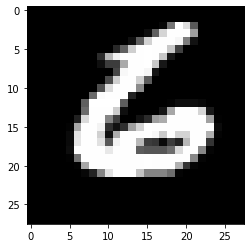

In [83]:
x = 9999
predict_image(test_dataset[x][0], model)
print(test_dataset[x][1])

ten, lab = test_dataset[x]

plt.imshow(ten[0],cmap='gray')

for i in range (10000):
    predict_image(test_dataset[i][0], model)
    print(test_dataset[i][1])